# TP1 : Logistic regression by gradient descent

## Etudiant : Mohamed Ben ALI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 1

In [2]:
def datagen(nb_points):
    """ Generates nb_points points uniformly in the unit square and assigns them a label with a randomized chance of being changed to the opposite class.
    """
    data = []
    labels = []
    for _ in range(nb_points):
        x1, x2 = np.random.uniform(low = 0, high = 1, size = 2)
        D = (0.5*x1 + x2 - 0.75) / np.sqrt(0.5**2 + 1) # distance between the generated point and the line
        r = np.exp(-D**2/(2*0.05**2))
        z = np.random.binomial(1, r/2)

        if D > 0: label = 1 - z
        else : label = 0 + z

        point = np.array([x1, x2])
        data.append(point)
        labels.append(label)
    return np.array(data), np.array(labels)


In [3]:
X, labels = datagen(300)

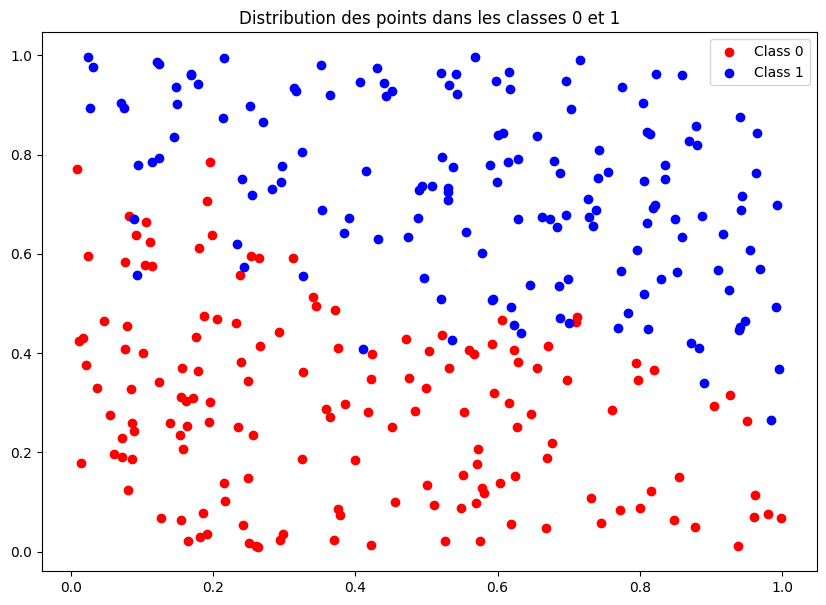

In [4]:
# We display points from class 0 and class 1 in different colors

class0 = X[labels == 0]
class1 = X[labels == 1]

plt.figure(figsize=(10,7))
plt.scatter(class0[:,0], class0[:,1], c='r')
plt.scatter(class1[:,0], class1[:,1], c='b')
plt.legend(["Class 0", "Class 1"])
plt.title("Distribution des points dans les classes 0 et 1")
plt.show()

## Question 2

In [5]:
# Concatenate X with a line of ones
X_plus = np.hstack((np.ones((X.shape[0],1)), X))

## Question 3

In [6]:
def sgm(x): return 1/(1+np.exp(-x)) # sigmoid function

def gradient_descent(X_plus, labels, learn_rate, iter_max):
    theta = np.random.rand(3)
    history = [theta]
    theta_new  = theta
    N_iter = 0

    while(True): # Ensures that we go through the loop at least once
        N_iter += 1
        theta = theta_new
        pred = sgm(X_plus.dot(theta)).reshape(len(X_plus),)
        err = pred - labels
        g = X_plus.T.dot(err)
        theta_new = theta - learn_rate*g
        history.append(theta_new)

        if not ((np.linalg.norm(theta_new-theta) > 10e-8) and (N_iter < iter_max)): break

    return history[-1], np.array(history)

## Question 4

In [11]:
def display_descent(thetas) :
    """ Displays a 3D representation of the elements of thetas over the iterations of the gradient descent.
    """
    fig = plt.figure(figsize=((7,7)))
    ax = fig.gca()
    ax.plot(thetas[:,0],thetas[:,1],thetas[:,2],"-o")
    plt.draw()

### Avec un learning rate de 0.02

Nombre d'itérations : 13685


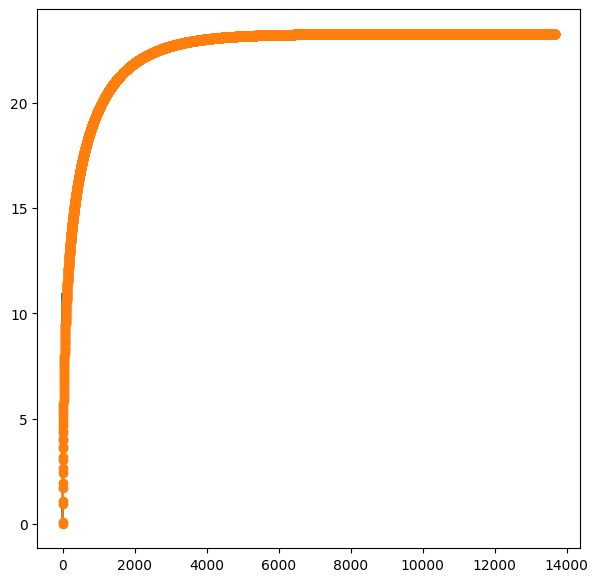

In [12]:
theta_desc_1, thetas_desc_1 = gradient_descent(X_plus, labels, 0.02, 50000)
print("Nombre d'itérations : " + str(len(thetas_desc_1)))
display_descent(thetas_desc_1)

### Avec un learning rate de 0.1

Nombre d'itérations : 2415


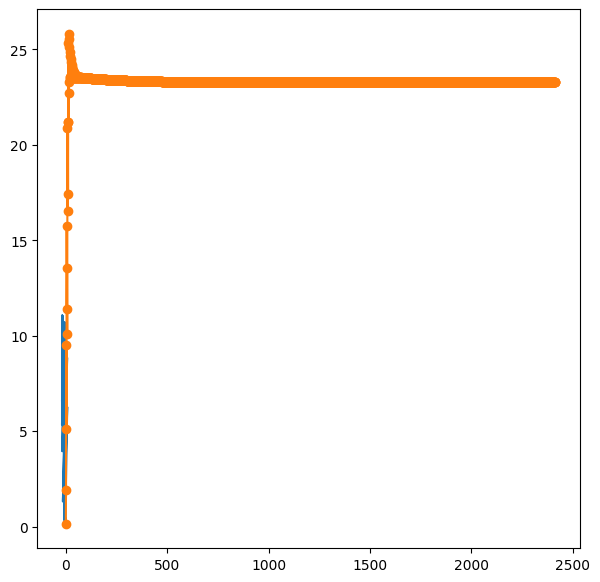

In [13]:
theta_desc_2, thetas_desc_2 = gradient_descent(X_plus, labels, 0.1, 50000)
print("Nombre d'itérations : " + str(len(thetas_desc_2)))
display_descent(thetas_desc_2)

### Commentaire

On observe qu'avec un learning rate plus important, on fait des pas de gradient plus grands : il y a plus d'oscillations et on risque de ne pas converger, mais si on converge effectivement la solution est atteinte bien plus vite.

## Question 5

In [14]:
def stochastic_gradient_descent(X_plus, labels, learn_rate, epoch_max):
    theta = np.random.rand(3)
    history = [theta]
    theta_new = theta
    N_epoch = 0

    while(True):
        N_epoch += 1
        if(N_epoch%10 == 0): print(f"...Processing epoch : {N_epoch}")

        # Permutation of data
        data_and_labels = np.hstack([X_plus, labels.reshape(len(X_plus),1)])
        data_and_labels = np.random.permutation(data_and_labels)

        X_plus_shuffled = data_and_labels[:,:3]
        labels_shuffled = data_and_labels[:,3]

        for i in range(len(X_plus_shuffled)) :
            theta = theta_new
            pred = sgm(X_plus_shuffled[i].dot(theta))
            err = pred - labels_shuffled[i]
            g = X_plus_shuffled[i]*err
            theta_new = theta - learn_rate*g

        history.append(theta_new)

        if(not((np.linalg.norm(theta_new-theta) > 10e-8) and (N_epoch < epoch_max))): break

    return history[-1], np.array(history), N_epoch

## Question 6

...Processing epoch : 10
...Processing epoch : 20
...Processing epoch : 30
...Processing epoch : 40
Nombre d'epochs : 44.


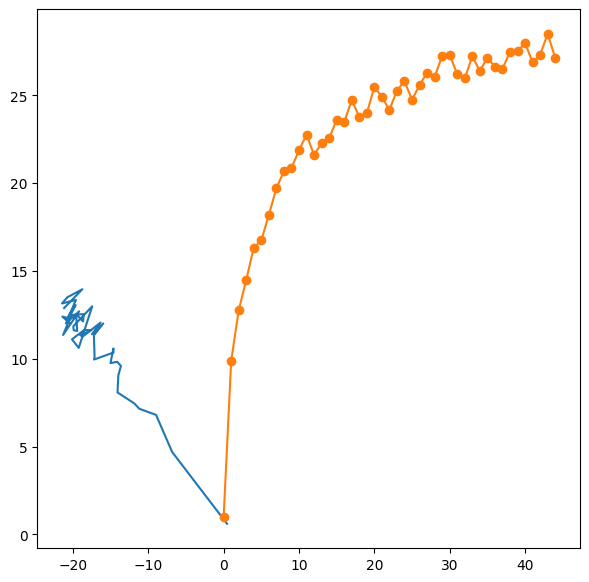

In [15]:
theta_stoch, thetas_stoch, epochs_stoch = stochastic_gradient_descent(X_plus, labels, 1.5, 100)
print(f"Nombre d'epochs : {epochs_stoch}.")
display_descent(thetas_stoch)

## Question 7

In [16]:
def boundary_figure(theta):
    plt.scatter(class0[:,0], class0[:,1], c='r')
    plt.scatter(class1[:,0], class1[:,1], c='b')

    x1 = np.linspace(0,1,10)
    x2 = (-theta[0]-theta[1]*x1)/theta[2]
    plt.plot(x1,x2,'k--')

    plt.legend(["Frontière de décision", "Class 0", "Class 1"])

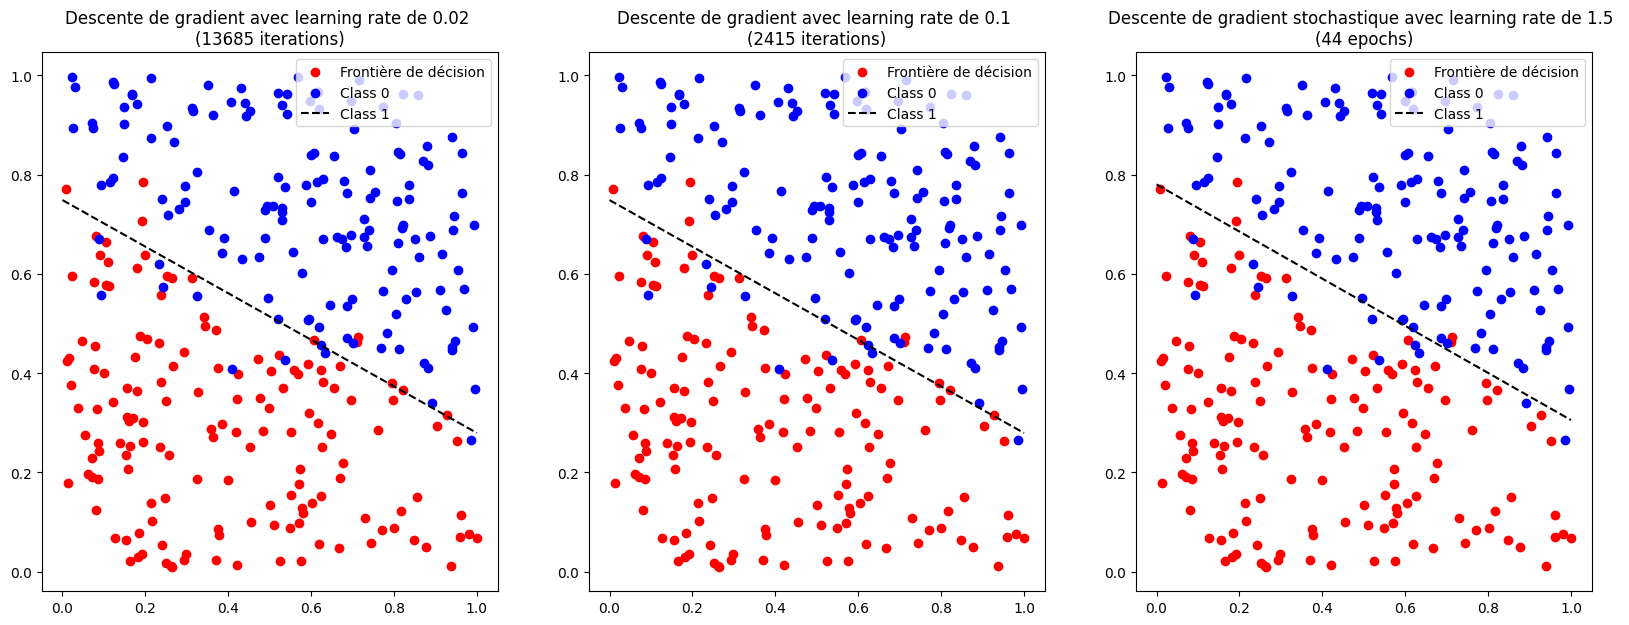

In [17]:
plt.figure(figsize=(20,7))

plt.subplot(131)
boundary_figure(theta_desc_1)
plt.title(f"Descente de gradient avec learning rate de 0.02 \n({len(thetas_desc_1)} iterations)")


plt.subplot(132)
boundary_figure(theta_desc_2)
plt.title(f"Descente de gradient avec learning rate de 0.1 \n({len(thetas_desc_2)} iterations)")


plt.subplot(133)
boundary_figure(theta_stoch)
plt.title(f"Descente de gradient stochastique avec learning rate de 1.5 \n({epochs_stoch} epochs)")

plt.show()

### Commentaire

On remarque que la méthode de gradient stochastique converge beaucoup plus vite, puisqu'une epoch de gradient stochastique correspond à une itération de gradient classique en termes de nombre de calculs. Cependant, il y a généralement plus de "bruit" au cours des epochs, ce qui peut donner des solutions de moins bonne qualité. En particulier, la frontière de décision semble parfois légèrement biaisée.

## Question 8

In [18]:
def sgd_batch(X_plus, labels, learn_rate, epoch_max, batch_size, epsilon):
    theta = np.random.rand(3)
    history = [theta]
    theta_new = theta
    N_epoch = 0

    while(True):
        N_epoch += 1
        if(N_epoch%10 == 0): print(f"...Processing epoch : {N_epoch}")

        # Permutation of data
        data_and_labels = np.hstack([X_plus, labels.reshape(len(X_plus),1)])
        data_and_labels = np.random.permutation(data_and_labels)

        X_plus_shuffled = data_and_labels[:,:3]
        labels_shuffled = data_and_labels[:,3]

        N = len(X_plus_shuffled)

        for i in range(0, N, batch_size) :
            k = min(batch_size, N - i) # manages the case where there is not enough remaining data to fill a batch

            theta = theta_new
            pred = sgm(X_plus_shuffled[i:i+k].dot(theta)).reshape(k,)
            err = pred - labels_shuffled[i:i+k]
            g = X_plus_shuffled[i:i+k].T.dot(err)
            theta_new = theta - learn_rate*g

        history.append(theta_new)

        if(not((np.linalg.norm(theta_new-theta) > epsilon) and (N_epoch < epoch_max))): break

    print(np.linalg.norm(theta_new-theta))

    return history[-1], np.array(history), N_epoch

...Processing epoch : 10
...Processing epoch : 20
...Processing epoch : 30
...Processing epoch : 40
...Processing epoch : 50
...Processing epoch : 60
...Processing epoch : 70
...Processing epoch : 80
...Processing epoch : 90
...Processing epoch : 100
...Processing epoch : 110
...Processing epoch : 120
...Processing epoch : 130
...Processing epoch : 140
...Processing epoch : 150
...Processing epoch : 160
...Processing epoch : 170
...Processing epoch : 180
...Processing epoch : 190
...Processing epoch : 200
...Processing epoch : 210
...Processing epoch : 220
...Processing epoch : 230
...Processing epoch : 240
...Processing epoch : 250
...Processing epoch : 260
...Processing epoch : 270
0.0009206256675979231
Nombre d'epochs : 271.


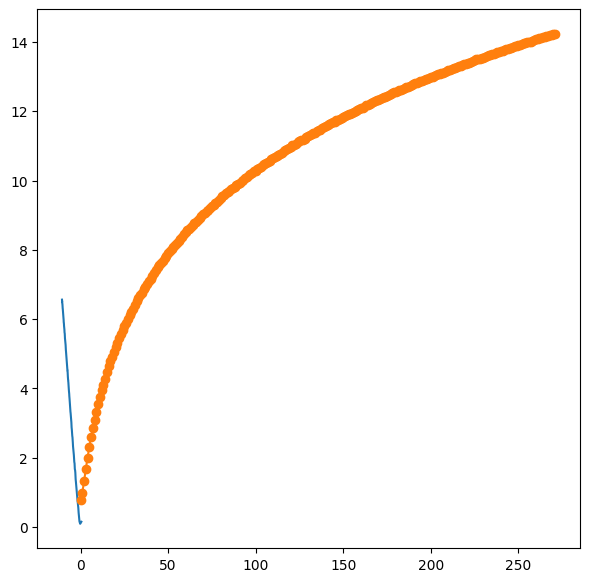

In [19]:
theta_batch, thetas_batch, epochs = sgd_batch(X_plus, labels, learn_rate = 0.02, epoch_max = 1000, batch_size = 10, epsilon = 10e-4)
print(f"Nombre d'epochs : {epochs}.")
display_descent(thetas_batch)

### Commentaire

On remarque qu'avec la méthode de mini-batch, plus d'epochs sont nécessaires pour converger. En contrepartie, on réduit les oscillations lors de la descente de gradient.